Số lượng mẫu sau khi xử lý ban đầu: 19818
Phân bổ tình cảm:
Sentiment
1    17448
0     2370
Name: count, dtype: int64

Ví dụ về văn bản sau khi làm sạch:
Gốc: Absolutely wonderful - silky and sexy and comfortable
Làm sạch: absolutely wonderful  silky and sexy and comfortable

Gốc: Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
Làm sạch: love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am   i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite

Gốc: I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but gre

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Bắt đầu huấn luyện mô hình LSTM...
Epoch 1/2
248/248 - 13s - 51ms/step - accuracy: 0.7644 - loss: 0.4657 - val_accuracy: 0.8393 - val_loss: 0.3897
Epoch 2/2
248/248 - 7s - 30ms/step - accuracy: 0.9079 - loss: 0.2345 - val_accuracy: 0.8464 - val_loss: 0.3623
Huấn luyện hoàn tất.

Đánh giá mô hình trên tập kiểm tra...
Loss trên tập kiểm tra: 0.3623
Accuracy trên tập kiểm tra: 0.8464
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.43      0.95      0.60       474
    Positive       0.99      0.83      0.91      3490

    accuracy                           0.85      3964
   macro avg       0.71      0.89      0.75      3964
weighted avg       0.92      0.85      0.87      3964


Đang vẽ ma trận nhầm lẫn...
Đã lưu ma trận nhầm lẫn vào file: confusion_matrix_lstm_weighted.png
Đã lưu đồ thị lịch sử huấn luyện vào file: training_history_lstm_weighted.png

Kết quả dự đoán cho các review mới (LSTM with

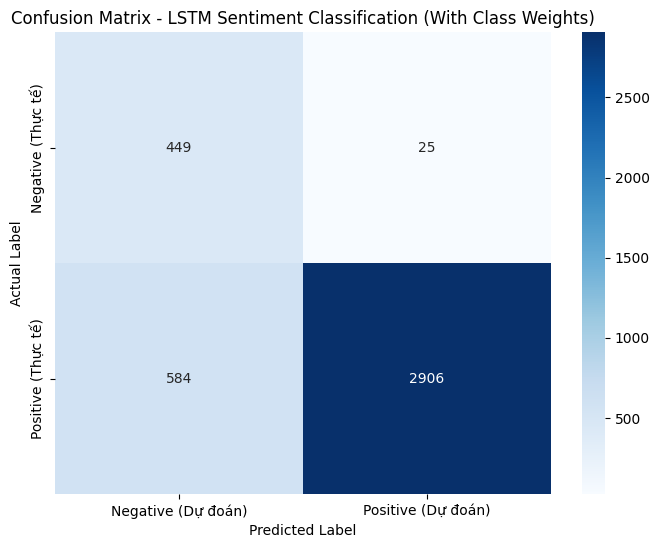

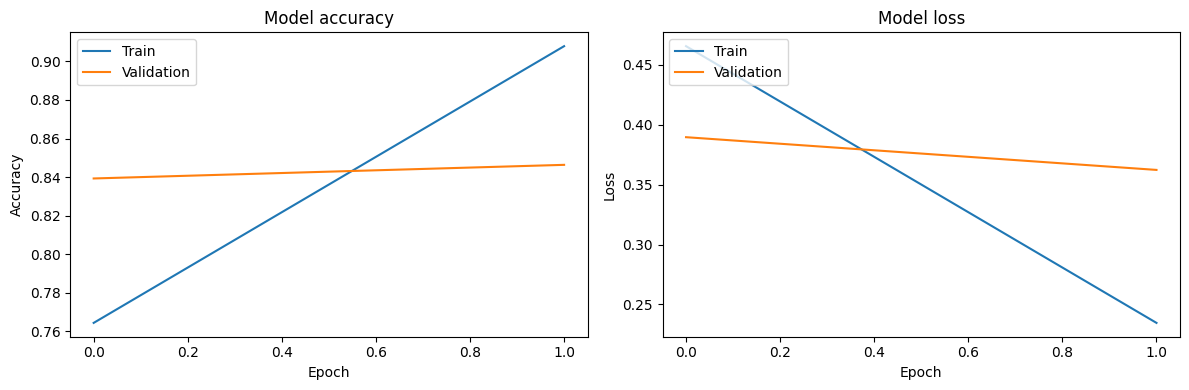

In [ ]:
#30s
import pandas as pd
import re
import numpy as np
import torch 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight # THÊM: Để tính trọng số lớp

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- 1. Tải và Xử lý Dữ liệu ---
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df = df.dropna(subset=['Review Text', 'Rating'])
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)
print(f"Số lượng mẫu sau khi xử lý ban đầu: {len(df)}")
sentiment_counts = df['Sentiment'].value_counts()
print(f"Phân bổ tình cảm:\n{sentiment_counts}")

# --- 2. Tiền xử lý văn bản ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

df['Cleaned Review'] = df['Review Text'].apply(clean_text)
print("\nVí dụ về văn bản sau khi làm sạch:")
for i in range(min(3, len(df))):
    print(f"Gốc: {df['Review Text'].iloc[i]}")
    print(f"Làm sạch: {df['Cleaned Review'].iloc[i]}\n")

# --- 3. Chuẩn bị dữ liệu cho LSTM ---
reviews = df['Cleaned Review'].tolist()
labels = df['Sentiment'].tolist()
train_texts, test_texts, train_labels_list, test_labels_list = train_test_split(
    reviews, labels, test_size=0.2, random_state=42, stratify=labels
)
train_labels = np.array(train_labels_list)
test_labels = np.array(test_labels_list)

# --- 4. Tokenization và Padding ---
VOCAB_SIZE = 10000
MAX_LENGTH = 150
EMBEDDING_DIM = 128

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"\nKích thước tập huấn luyện sau padding: {train_padded.shape}")
print(f"Kích thước tập kiểm tra sau padding: {test_padded.shape}")
word_index = tokenizer.word_index
print(f"Kích thước từ vựng: {len(word_index)}")

# --- 4.1. XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU: ---
unique_classes = np.unique(train_labels)
print(f"Các lớp duy nhất trong tập huấn luyện: {unique_classes}")

class_weights_calculated = compute_class_weight(
    class_weight=
    {0: 4.14,
    1: 0.576},
    classes=unique_classes,
    y=train_labels
)
class_weights_dict = dict(zip(unique_classes, class_weights_calculated))

print(f"Trọng số lớp được tính toán: {class_weights_dict}")
is_imbalanced = abs(sentiment_counts.get(0, 0) - sentiment_counts.get(1, 0)) / len(df) > 0.1 # Ngưỡng ví dụ 10%
if not is_imbalanced:
    print("Phân bổ dữ liệu tương đối cân bằng, có thể không cần thiết sử dụng trọng số lớp.")
# --- 5. Xây dựng Mô hình LSTM ---
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=32)),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# --- 6. Huấn luyện Mô hình ---
NUM_EPOCHS = 2
BATCH_SIZE = 64

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nBắt đầu huấn luyện mô hình LSTM...")
history = model.fit(
    train_padded,
    train_labels,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(test_padded, test_labels),
    callbacks=[early_stopping],
    class_weight=class_weights_dict, 
    verbose=2
)
print("Huấn luyện hoàn tất.")

# --- 7. Đánh giá Mô hình ---
print("\nĐánh giá mô hình trên tập kiểm tra...")
loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
print(f"Loss trên tập kiểm tra: {loss:.4f}")
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

y_pred_probs = model.predict(test_padded).flatten()
y_pred_classes = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(test_labels, y_pred_classes, target_names=["Negative", "Positive"]))

# --- 8. Ma trận nhầm lẫn ---
print("\nĐang vẽ ma trận nhầm lẫn...")
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative (Dự đoán)", "Positive (Dự đoán)"],
            yticklabels=["Negative (Thực tế)", "Positive (Thực tế)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - LSTM Sentiment Classification (With Class Weights)")
plt.savefig("confusion_matrix_lstm_weighted.png")
print("Đã lưu ma trận nhầm lẫn vào file: confusion_matrix_lstm_weighted.png")

# --- Vẽ đồ thị Accuracy và Loss trong quá trình huấn luyện ---
def plot_training_history(history, suffix=""):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig(f"training_history_lstm{suffix}.png")
    print(f"Đã lưu đồ thị lịch sử huấn luyện vào file: training_history_lstm{suffix}.png")

plot_training_history(history, suffix="_weighted")

# --- 9. Dự đoán với các review mới ---
def predict_sentiment_lstm(texts, tokenizer_model, trained_model, max_len):
    cleaned_texts = [clean_text(text) for text in texts]
    sequences = tokenizer_model.texts_to_sequences(cleaned_texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
    predictions = trained_model.predict(padded_sequences).flatten()
    results = []
    for text, pred_prob in zip(texts, predictions):
        sentiment = "Positive" if pred_prob > 0.5 else "Negative"
        results.append({"review": text, "sentiment": sentiment, "score": float(pred_prob)})
    return results

new_reviews = [
    "This dress is fantastic! I love it!",
    "The fabric is terrible and it ripped easily.",
    "I am very satisfied with this purchase, great quality!",
    "Poorly made, not worth the money.",
    "Absolutely love this! Fits perfectly.",
    "Not happy at all, bad experience.",
    "Wonderful fabric and excellent design!",
    "Size was incorrect and material feels cheap.",
    "The product is okay, not great but not bad either.",
    "I'm on the fence about this one."
]

print("\nKết quả dự đoán cho các review mới (LSTM with Class Weights):")
predictions_new = predict_sentiment_lstm(new_reviews, tokenizer, model, MAX_LENGTH)
for p in predictions_new:
    print(f"Review: \"{p['review']}\" -> Sentiment: {p['sentiment']} (Score: {p['score']:.4f})")

# --- 10. Lưu mô hình và Tokenizer (Keras) ---
print("\nLưu mô hình Keras và Tokenizer...")
model_save_path_keras = "saved_lstm_sentiment_model_weighted.keras"
model.save(model_save_path_keras)
print(f"Đã lưu mô hình Keras vào: {model_save_path_keras}")

import pickle
tokenizer_save_path = "tokenizer_lstm_weighted.pickle"
with open(tokenizer_save_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Đã lưu tokenizer vào: {tokenizer_save_path}")

print("\nHoàn thành script với LSTM và xử lý mất cân bằng.")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv
